<a href="https://colab.research.google.com/github/francosuriano/ML2022/blob/main/Ej_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargado del dataset

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


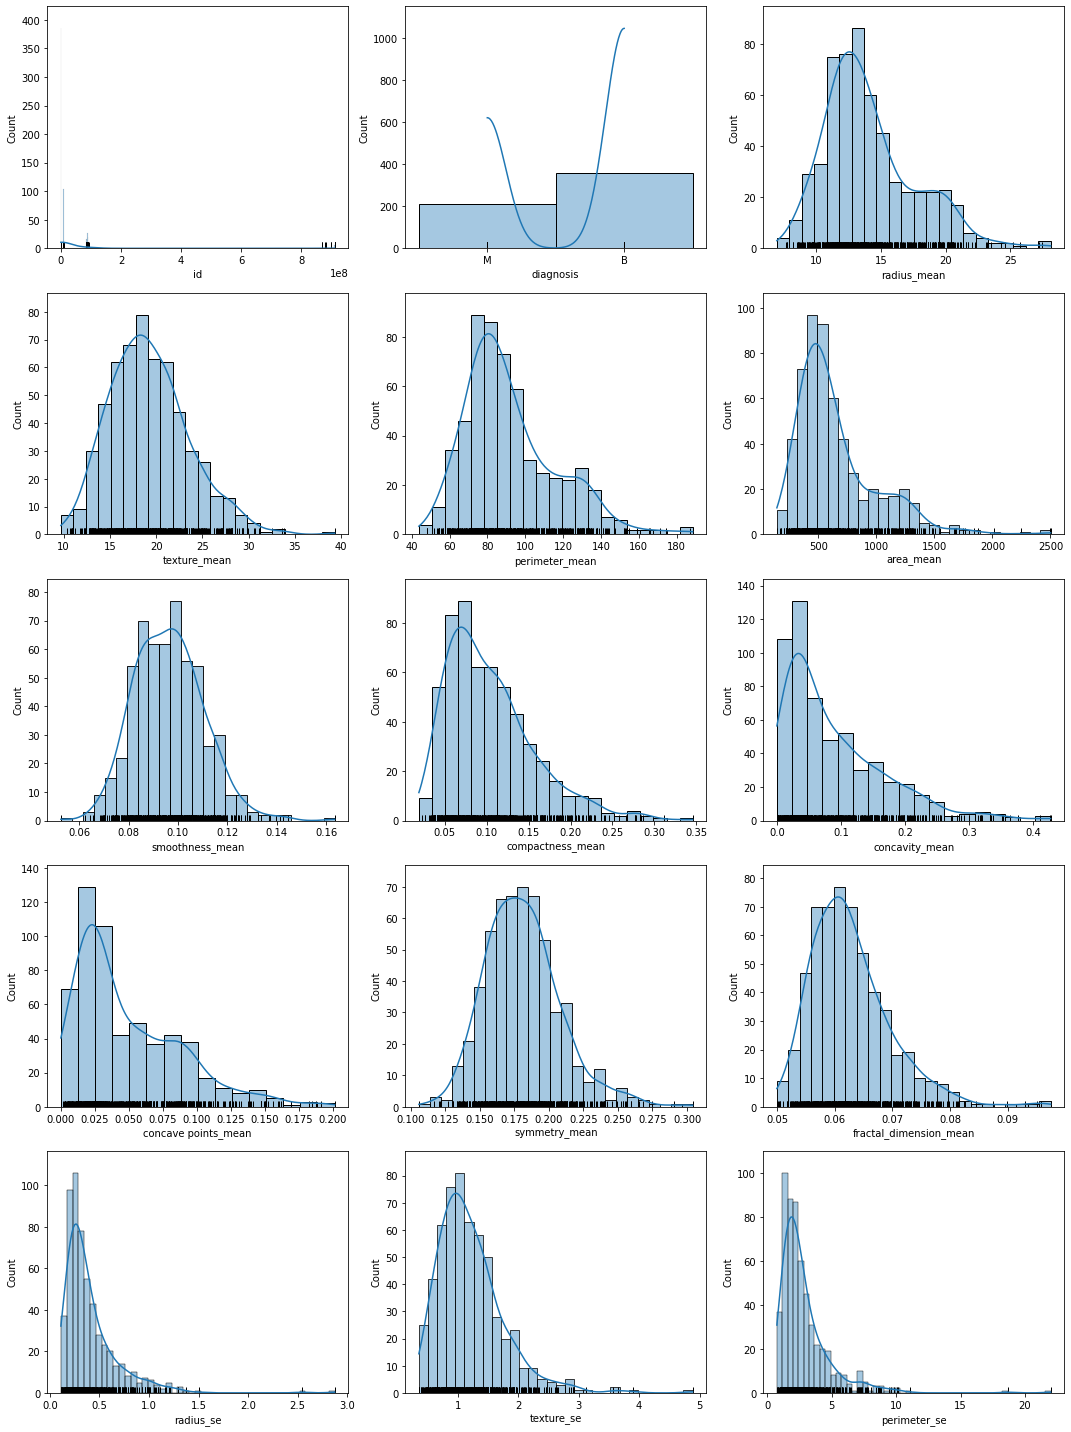

In [ ]:
# Armamos histogramas de distribución para observar los features involucrados

import seaborn as sns
import matplotlib.pyplot as plt

def histo(data, ax): # función que calcula la distribución de un feature específico

    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
   
def distr_datasets(df, fig_alto, fig_ancho): # función genérica que calcula las distribuciones de todo el dataset

    cols = df.columns
    fig, axes = plt.subplots(fig_alto, fig_ancho, figsize=((fig_ancho*25)//5, (fig_alto*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        histo(df[col_name], ax)

    fig.tight_layout()
    plt.show()

features = df.keys()
distr_datasets(df[features],5,3)

In [ ]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Separamos el dataset en features y target

X = df.drop(['diagnosis','Unnamed: 32','id'], axis = 1)
y = df['diagnosis']

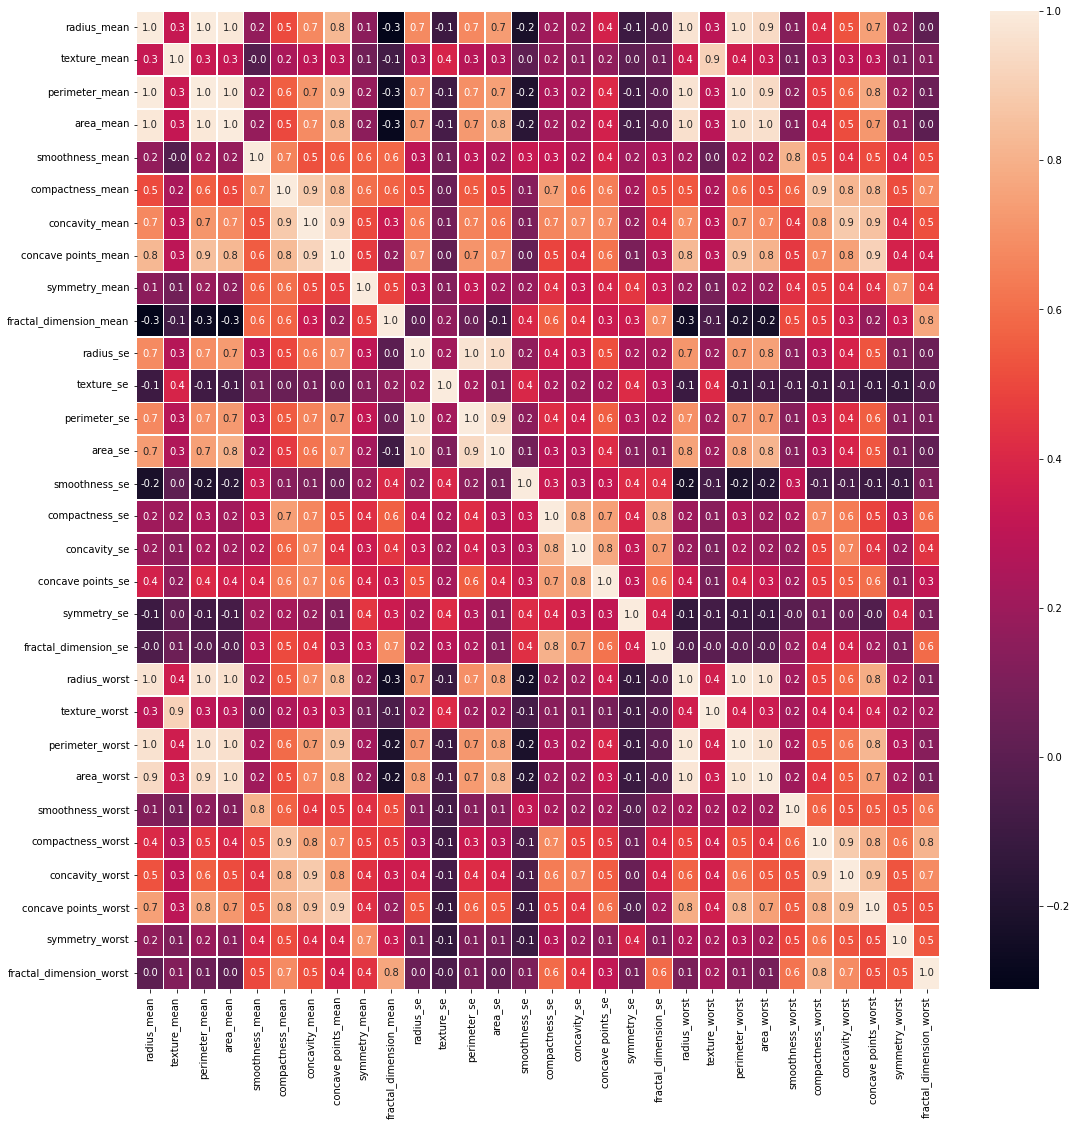

In [ ]:

#Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Modelo SIN reducción de dimensionalidad: KNN

In [ ]:

# Modelo SIN reducción de dimensionalidad
%time

from sklearn import neighbors
from sklearn.model_selection import train_test_split

df_features = df.drop(['diagnosis','id','Unnamed: 32'], 1)
df_target = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=20)

# Prueba para varios k
import numpy as np
from matplotlib import pyplot as plt

vecinos = np.arange(1, 20)
score = np.empty(len(vecinos))
 
for i, k in enumerate(vecinos):
    # se entrena en cada iteracion 
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # y se evalua el score sobre el conjunto de testeo
    score[i] = knn.score(X_test, y_test)


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs


<ipython-input-57-9593d2dd8b7a>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_features = df.drop(['diagnosis','id','Unnamed: 32'], 1)


# Método: KBEST

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
(569, 4)


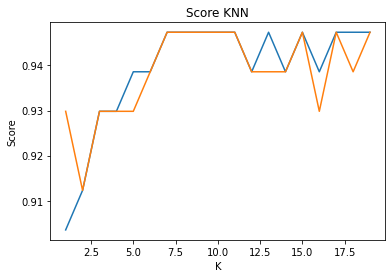

In [ ]:
# Método KBEST 
%time

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new1 = SelectKBest(chi2, k=4).fit_transform(X, y)
print(X_new1.shape)

# Testeo y comparación

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new1, y, test_size=0.2, random_state=20)

# Prueba para varios k

vecinos = np.arange(1, 20)
score1 = np.empty(len(vecinos))
 
for i, k in enumerate(vecinos):
    # se entrena en cada iteracion 
    knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train1, y_train1)
    # y se evalua el score sobre el conjunto de testeo
    score1[i] = knn1.score(X_test1, y_test1)

# Comparación
# azul es sin reduccir 

plt.title('Score KNN')
plt.plot(vecinos,score,vecinos,score1)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

# Método: ExtraTreeClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(569, 10)


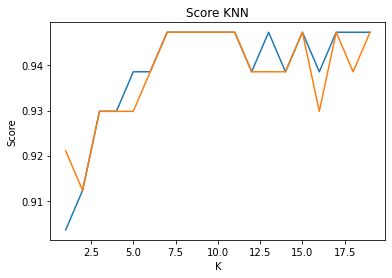

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
 
X.shape
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new2 = model.transform(X)
print(X_new2.shape) 

# Testeo y comparación

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new2, y, test_size=0.2, random_state=20)

# Prueba para varios k

vecinos = np.arange(1, 20)
score2 = np.empty(len(vecinos))
 
for i, k in enumerate(vecinos):
    # se entrena en cada iteracion 
    knn2 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train2, y_train2)
    # y se evalua el score sobre el conjunto de testeo
    score2[i] = knn2.score(X_test2, y_test2)

# Comparación
# azul es sin reduccir 

plt.title('Score KNN')
plt.plot(vecinos,score,vecinos,score2)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()





# Selección de features con modelo de Clasificación Random Forest

Una vez probados los métodos de reducción con el modelo KNN, procedemos a utilizarlo en el clasificador de Random Forest para comparar resultados:

## Método: Recursive Feature Elimination con Cross Validation





Número óptimo de features : 15
---------------------------------------
Features más importantes : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')
---------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


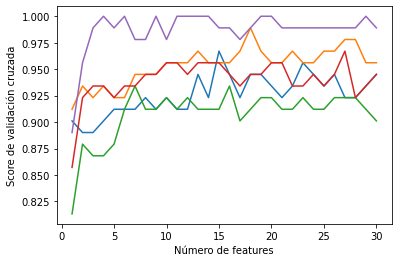

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
 

# Armamos el modelo y evaluamos la validación cruzada con k=5

clf_rf_3 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy') 
rfecv = rfecv.fit(X_train, y_train)

# Mostramos el número óptimo de features y cuales son los mas importantes 

print('Número óptimo de features :', rfecv.n_features_)
print('---------------------------------------')

print('Features más importantes :', X_train.columns[rfecv.support_])
print('---------------------------------------')

# Graficamos los resultados del score de validación cruzada para comparar

plt.figure()
plt.xlabel("Número de features")
plt.ylabel("Score de validación cruzada")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



A partir del análisis de validación cruzada, podemos observar:
 

1. Como para los cinco casos como la tendencia del score aumenta a medida que tenemos mayor cantidad de features. 
2. El máximo de los cinco casos lo encontramos en el número de features que maximiza el score de todas las curvas. En este caso, n = 15. 
3. Observamos también, los buenos resultados que se desprenden con este modelo, generando scores muy cercanos a 1 (aumentan un poco respecto al modelo KNN).




